In [1]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [3]:
# One hot encoding.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [4]:
print(y_train.shape, y_test.shape)

(50000, 10) (10000, 10)


In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [6]:
def generate_model():
    return tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Activation('softmax')
  ])

model = generate_model()

In [7]:
opt = RMSprop(learning_rate=0.0001, decay=1e-6)

model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
datagen = ImageDataGenerator(
            zca_epsilon=1e-06,
            rotation_range=10,
            width_shift_range=0.1,
            height_shift_range=0.1,
            zoom_range=0.1,
            fill_mode='nearest',
            cval=0.,
            horizontal_flip=True
            )

In [9]:
datagen.fit(x_train)

In [10]:
history = model.fit_generator(datagen.flow(x_train, y_train,
                                    batch_size=32),
                                    epochs=100,
                                    steps_per_epoch = 1563,
                                    validation_data=(x_test, y_test)
                                    )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
1563/1563 [==============================] - 29s 18ms/step - loss: 1.8795 - accuracy: 0.3100 - val_loss: 1.6934 - val_accuracy: 0.3975- - ETA: 1s - loss: 1 - ETA: 1s - los - ETA: 0s - loss: 1.8807 - accura
Epoch 2/100
1563/1563 [==============================] - 32s 20ms/step - loss: 1.6139 - accuracy: 0.4087 - val_loss: 1.4210 - val_accuracy: 0.4800
Epoch 3/100
1563/1563 [==============================] - 33s 21ms/step - loss: 1.5002 - accuracy: 0.4540 - val_loss: 1.3010 - val_accuracy: 0.52820s - loss: 1.5356 - accuracy: 0.4 - ETA: 20s - loss: 1.5344 - accuracy:  - ETA: 20s - loss: 1.5340 - accuracy: 0 - ETA: 19s - E
Epoch 4/100
1563/1563 [==============================] - 32s 21ms/step - loss: 1.4188 - accuracy: 0.4899 - val_loss: 1.2334 - val_accuracy: 0.5612
Epoch 5/100
1563/1563 [==============================] - 33s 21ms/step - loss: 1.3610 - accuracy: 0.5123 - val_loss: 1.1839 - val_accuracy

1563/1563 [==============================] - 52s 33ms/step - loss: 0.9313 - accuracy: 0.6751 - val_loss: 0.8272 - val_accuracy: 0.7136- ETA: 28s - loss: 0.9209 - - ETA: 27s - loss: 0.9185 - accu - ETA: 27s - los - ETA: 25s - loss: 0.9278 - accuracy: 0. - ETA: 25s - loss: 0.9287 - accuracy: 0 - ETA: 24s - loss: 0.9242 - accuracy - ETA: 24s
Epoch 23/100
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9185 - accuracy: 0.6805 - val_loss: 0.8142 - val_accuracy: 0.71847 - accura
Epoch 24/100
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9135 - accuracy: 0.6802 - val_loss: 0.9306 - val_accuracy: 0.6825 0.9087 - accuracy - E - ETA: 49s - - ETA: 26s - loss: 0.9135 - - ETA: 24s - 
Epoch 25/100
1563/1563 [==============================] - 52s 34ms/step - loss: 0.9087 - accuracy: 0.6846 - val_loss: 1.0115 - val_accuracy: 0.67916 - ETA: 28s - loss: 0.9049 - ETA: 26s - loss: 0.9058 - a - ETA: 20s - loss: 0.9053 - accuracy: 0.684 - ETA: 20s - loss: 0.9047 -

1563/1563 [==============================] - 41s 27ms/step - loss: 0.8407 - accuracy: 0.7136 - val_loss: 0.8366 - val_accuracy: 0.7211TA: 31s - loss: 0.84 - ETA: 31s - loss: 0.84 - ETA: 30s - loss: 0.8434 -   - ETA: 36s - loss: 0.8412 - accuracy: 0.7 - ETA: 35s - loss: 0.844 - ETA: 33s - loss:
Epoch 46/100
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8359 - accuracy: 0.7154 - val_loss: 0.7050 - val_accuracy: 0.7659.8564 - accur - ETA: 32s - loss: 0.8499 - accuracy: - ETA: 32s - loss: 0.8377 - accur - ETA: 31s - lo - ETA: 30s - loss: 0.8396 - accuracy: 0 - ETA: 27s - loss: 0.8352 - accur - ETA: 26s - loss: 0.8348 - accuracy - ETA: 25s - los - ETA: 23s - loss: 0.8375 - accur - ETA: 23s - loss: 0.8385 - a - ETA: 21s - loss: 0.8389 - ac - ETA: 21s - loss: 0.8338 - accuracy: 0. - ETA: 20s - loss: 0.8352 - accuracy: 0. - ETA: 20s - loss: 0. - ETA: 19s - - ETA: 17s - loss: 0.8390 - accur - ETA: 16s - loss: 0.8396 - accuracy:  - ETA: 16s - loss: 0.8376 - a - ETA: 15s - 

1563/1563 [==============================] - 44s 28ms/step - loss: 0.8180 - accuracy: 0.7262 - val_loss: 0.6914 - val_accuracy: 0.7715
Epoch 64/100
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8130 - accuracy: 0.7263 - val_loss: 1.0325 - val_accuracy: 0.7000
Epoch 65/100
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8155 - accuracy: 0.7261 - val_loss: 0.8443 - val_accuracy: 0.7218 - ETA: 3s - - ETA: 1s - loss: 0.8166 - ac - ETA: 1s - loss: 0.8166 - accuracy: 0. - ETA: 1s
Epoch 66/100
1563/1563 [==============================] - 40s 26ms/step - loss: 0.8268 - accuracy: 0.7205 - val_loss: 0.9016 - val_accuracy: 0.7068A: 27s - loss: 0.8262 - accura - ETA: 27s - loss: 0.8258 - accuracy - ETA: 18s - loss: 0.8280 - accuracy: - ETA: 18s - loss: 0.8306 - accu - ETA: 17s - los - ETA: 16s - loss: 0.8314 - accur - ETA: 16s - loss: 0 - ETA: 14s - lo - ETA: 12s -  - ETA: 11s - loss: 0.8283 - accuracy: 0 - ETA: 11s -  - ETA: 10s - loss: 0.8287 - ETA: 10

1563/1563 [==============================] - 40s 26ms/step - loss: 0.8157 - accuracy: 0.7277 - val_loss: 0.7343 - val_accuracy: 0.7505A: 30s - loss: 0.8 - ETA: 25s - loss: 0.8179 - accuracy: 0.726 - ETA: 24s - loss: 0.8192 - accuracy:  - ETA: 24s - loss: 0.8173 - accuracy:  - ETA: 24s - lo - ETA: 21s - loss: 0.8165 - accuracy: 0.726 - ETA: 21s - loss: 0.8162 - accur - ETA: 20s - loss: 0.8146  - ETA: 19s - loss: 0.8109 - accuracy: 0. - ETA: 19s - loss: 0.8114 - ETA: 17s - loss: 0.8113 - acc - ETA: 16s - loss: 0.8126 - accurac - ETA: 16s - loss: 0.8126 - accuracy: 0.728 - ETA: 16s - loss: 0.813 - ETA: 8s - loss: 0.8168 - accuracy:  - ETA: 8s - loss: - - ETA: 
Epoch 84/100
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8212 - accuracy: 0.7247 - val_loss: 0.7291 - val_accuracy: 0.7533A: 30s - loss: 0.8240 - accuracy: 0.7 - ETA: 30s - loss: 0.8223 - accuracy - ETA: 29s - loss: 0. - ETA - ETA: 0s - loss: 0.8212 - 
Epoch 85/100
1563/1563 [==============================] 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


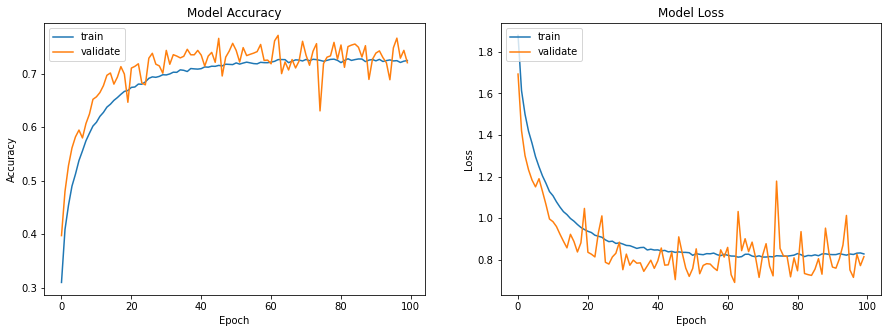

In [12]:
import matplotlib.pyplot as plt

def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)